# Data Cleaning

In [440]:
import pandas as pd
import numpy as np

# Load the CSV file
file_path = 'bhaisepati_station.csv'  
data = pd.read_csv(file_path)

# Convert the datetime column to a datetime object
data['datetime'] = pd.to_datetime(data['datetime'])

# Get unique particulate matter types
unique_pm_types = data['particulate_matter'].unique()

# Create separate CSVs for each particulate matter type
for pm_type in unique_pm_types:
    pm_data = data[data['particulate_matter'] == pm_type]
    pm_data.to_csv(f'air_quality_{pm_type}.csv', index=False)


In [ ]:
    # Print the first few rows of each resulting DataFrame
    print(f"Head of air_quality_{pm_type}.csv:")
    print(pm_data.head())
    print("\n")

+ We began by loading the CSV file containing air quality data into a Pandas DataFrame.
+ The datetime column was converted to a datetime object to facilitate time-based operations.
+ We identified unique particulate matter types and created separate CSV files for each type.

In [442]:
#### Define the times of interest
times_of_interest = [6, 12, 18, 0]

# List of particulate matter types and corresponding CSV files
pm_types = ['PM1', 'PM2.5', 'PM10', 'TSP']

for pm_type in pm_types:
    # Load the CSV file
    file_path = f'air_quality_{pm_type}.csv'  # Update path if necessary
    data = pd.read_csv(file_path)
    
    # Convert the datetime column to a datetime object
    data['datetime'] = pd.to_datetime(data['datetime'])
    
    # Filter the data to include only the desired times
    filtered_data = data[data['datetime'].dt.hour.isin(times_of_interest)]
    
    # Save the filtered data to a new CSV file
    output_file_path = f'reduced_air_quality_{pm_type}.csv'
    filtered_data.to_csv(output_file_path, index=False)

print("Data reduction completed and saved to new CSV files.")


Data reduction completed and saved to new CSV files.


### Filtered Data for Specific Times of the Day:

+ To address the inconsistency in the data collection frequency (some data points recorded every 5 or 6 seconds and others less frequently), we filtered the data to include records only from specific times of the day: 6 AM, 12 PM, 6 PM, and midnight.
+ This filtering helped balance the dataset and reduce the number of rows, making it more manageable and consistent for analysis.

In [434]:

# Dictionary to store dataframes
data_frames = {}

# Load the reduced CSV files and drop unnecessary columns
for pm_type in pm_types:
    file_path = f'reduced_air_quality_{pm_type}.csv'
    data = pd.read_csv(file_path)
    data['datetime'] = pd.to_datetime(data['datetime'])
    data = data.drop(columns=['_id', 'particulate_matter', 'station'])
    data = data.sort_values(by='datetime')  # Sort by datetime
    data_frames[pm_type] = data

# Display the first few rows of each dataframe to verify
for pm_type, df in data_frames.items():
    print(f"Data for {pm_type}:")
    display(df.head())
    print("\n")


Data for PM1:


,datetime,value
2512,2019-01-01 00:02:46,29.0
2513,2019-01-01 00:32:46,33.8
2514,2019-01-01 00:52:46,39.9
2515,2019-01-01 06:22:46,23.7
2516,2019-01-01 12:42:46,19.2




Data for PM2.5:


,datetime,value
1,2020-05-11 06:57:28,27.0
2,2020-05-11 06:57:36,27.0
0,2020-05-11 06:57:40,27.0
3,2020-05-11 12:13:21,19.2
4,2020-05-11 12:27:21,22.4




Data for PM10:


,datetime,value
0,2020-03-07 00:11:27,27.6
1,2020-03-07 00:24:50,25.7
2,2020-03-07 00:43:48,21.9
3,2020-03-07 00:58:37,26.3
4,2020-03-07 06:11:27,33.5




Data for TSP:


,datetime,value
2,2020-05-11 06:57:44,34.9
1,2020-05-11 06:57:45,34.9
0,2020-05-11 06:57:53,34.9
3,2020-05-11 12:13:52,29.2
5,2020-05-11 12:27:42,121.3


### Dropped Irrelevant Columns:

- We removed the _id and station columns as they provided no meaningful insights for our analysis.
- The particulate_matter column was also dropped since we already created separate CSV files for each type of particulate matter (PM1, PM2.5, PM10, and TSP).

In [316]:
# Check for missing values
for pm_type, df in data_frames.items():
    print(f"Missing values in {pm_type}:")
    print(df.isnull().sum())


Missing values in PM1:
datetime    0
value       0
dtype: int64
Missing values in PM2.5:
datetime    0
value       0
dtype: int64
Missing values in PM10:
datetime    0
value       0
dtype: int64
Missing values in TSP:
datetime    0
value       0
dtype: int64


### Remove Outliers

In [318]:
# Summary statistics
for pm_type, df in data_frames.items():
    print(f"Summary statistics for {pm_type}:")
    print(df.describe())


Summary statistics for PM1:
                            datetime        value
count                           8814  8814.000000
mean   2020-05-02 13:22:37.465395968    30.108924
min              2019-01-01 00:02:46     0.000000
25%       2019-12-31 20:16:37.500000     5.400000
50%              2020-07-02 18:28:31    19.300000
75%              2020-09-27 18:36:38    41.400000
max              2021-04-01 06:39:59   441.200000
std                              NaN    44.877221
Summary statistics for PM2.5:
                            datetime        value
count                           5245  5245.000000
mean   2020-09-15 22:16:17.974261504    35.589102
min              2020-05-11 06:57:28     0.000000
25%              2020-08-01 18:28:44     2.400000
50%              2020-09-10 00:28:26    18.700000
75%              2020-11-08 18:25:31    45.400000
max              2021-04-01 06:39:58   456.100000
std                              NaN    59.170770
Summary statistics for PM10:
             

From the summary statistics, it's evident that outliers are present in the dataset, particularly in the Total Suspended Particulates (TSP) data. The maximum value for TSP is 6500.000000, which is dramatically higher than the other statistical values, indicating the presence of outliers.

To address these outliers, we employed the Interquartile Range (IQR) method to identify and remove outliers from each particulate matter type in the dataset. The cleaned data will provide a more accurate representation for further analysis.

By removing these outliers, we aim to ensure the reliability and accuracy of the subsequent data analysis and modeling processes.

In [330]:

# import os

# # Define a directory to save the CSV files
# # output_dir = 'cleaned_data'

# # # Create the directory if it doesn't exist
# # if not os.path.exists(output_dir):
# #     os.makedirs(output_dir)
    
#     # Function to remove outliers using the IQR method
# def remove_outliers(df):
#     Q1 = df['value'].quantile(0.25)
#     Q3 = df['value'].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     return df[(df['value'] >= lower_bound) & (df['value'] <= upper_bound)]

# # Remove outliers for each particulate matter type
# for pm_type, df in data_frames.items():
#     df = remove_outliers(df)
#     # Save the cleaned DataFrame as a CSV file
#     # output_file = os.path.join(output_dir, f"{pm_type}_cleaned.csv")
#     # df.to_csv(output_file, index=False)

# Function to remove outliers using the IQR method
def remove_outliers(df):
    Q1 = df['value'].quantile(0.25)
    Q3 = df['value'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df['value'] >= lower_bound) & (df['value'] <= upper_bound)]

# Remove outliers for each particulate matter type
for pm_type, df in data_frames.items():
    df = remove_outliers(df)
    data_frames[pm_type] = df


In [332]:
# Summary statistics
for pm_type, df in data_frames.items():
    print(f"Summary statistics for {pm_type}:")
    print(df.describe())

Summary statistics for PM1:
                            datetime        value
count                           8546  8546.000000
mean   2020-04-27 06:44:33.277439744    24.350335
min              2019-01-01 00:02:46     0.000000
25%       2019-12-26 12:14:27.500000     5.100000
50%              2020-06-27 18:57:38    18.200000
75%    2020-09-25 06:47:00.249999872    38.900000
max              2021-04-01 06:39:59    95.400000
std                              NaN    22.656259
Summary statistics for PM2.5:
                            datetime        value
count                           4978  4978.000000
mean   2020-09-12 00:11:04.494375168    24.900205
min              2020-05-11 06:57:28     0.000000
25%              2020-07-28 12:28:33     1.300000
50%              2020-09-07 00:58:45    16.300000
75%              2020-11-01 12:21:58    40.500000
max              2021-04-01 06:39:58   108.400000
std                              NaN    25.920959
Summary statistics for PM10:
             

+ After applying the Interquartile Range (IQR) method to remove outliers, we observed a significant improvement in the dataset's summary statistics.

# Exploratory Data Analysis (EDA) of Air Quality Data
Now we proceed with the Exploratory Data Analysis (EDA) to better understand the distribution and trends in the dataset. This involves visualizing the time series for each type of particulate matter.

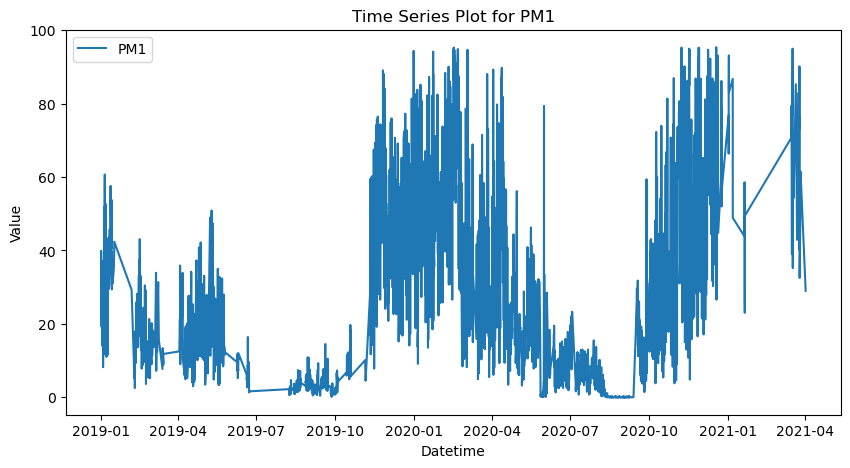

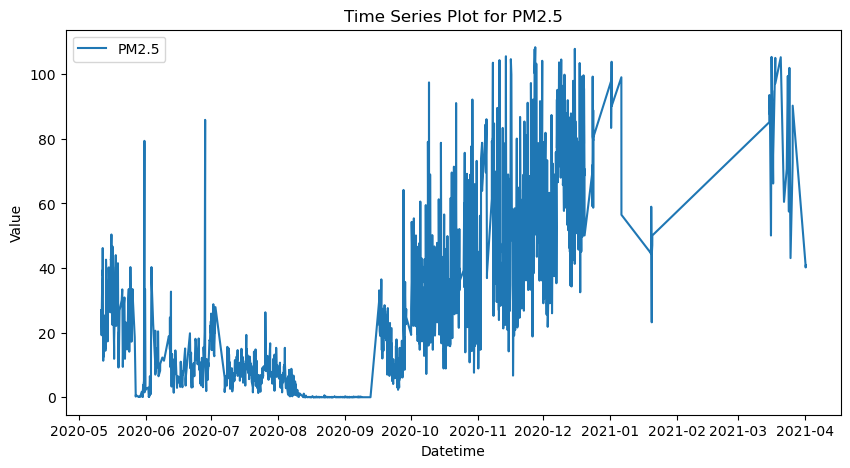

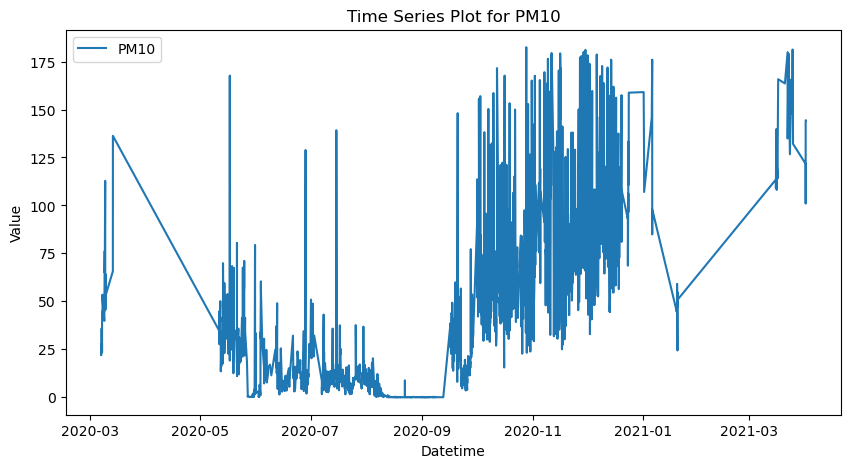

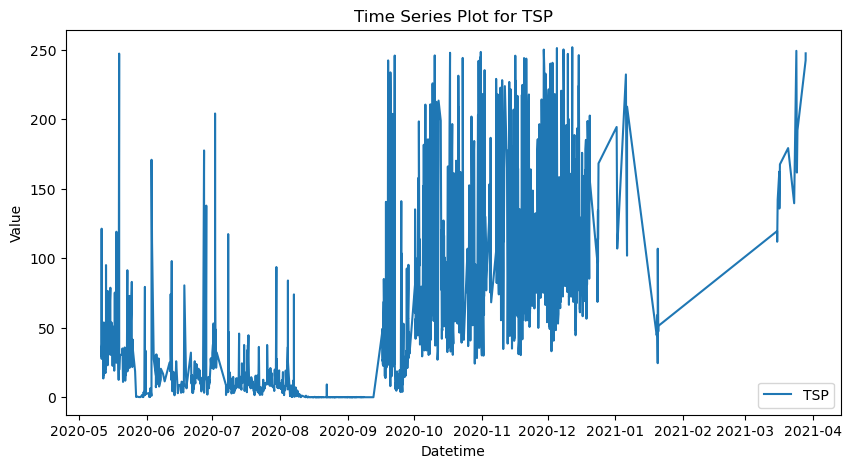

In [334]:
import matplotlib.pyplot as plt

# Time series plots
for pm_type, df in data_frames.items():
    plt.figure(figsize=(10, 5))
    plt.plot(df['datetime'], df['value'], label=pm_type)
    plt.xlabel('Datetime')
    plt.ylabel('Value')
    plt.title(f'Time Series Plot for {pm_type}')
    plt.legend()
    plt.show()


# Research Questionnarie

### Research Question 1:
What was the impact of the COVID-19 lockdown on air quality in Kathmandu, and how did it compare to air quality levels before and after the lockdown?

In [367]:
# Define the lockdown period
lockdown_start = pd.to_datetime('2020-03-24')
lockdown_end = pd.to_datetime('2020-09-24')

In [369]:
# Define time periods
def categorize_period(datetime):
    if datetime < lockdown_start:
        return 'Before'
    elif lockdown_start <= datetime <= lockdown_end:
        return 'During'
    else:
        return 'After'


In [371]:
# Add period column
for pm_type, df in data_frames.items():
    df['period'] = df['datetime'].apply(categorize_period)
    data_frames[pm_type] = df

/var/folders/2c/ns543zl17xq2szq3lhqt79x00000gn/T/ipykernel_21438/3289047367.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['period'] = df['datetime'].apply(categorize_period)



Statistics for PM1:
+--------+--------------------+--------------------+-------------------+-----+------+
| Period |        Mean        |       Median       |      Std Dev      | Min | Max  |
+--------+--------------------+--------------------+-------------------+-----+------+
| Before | 28.621153223194035 |        24.8        | 21.74093958150739 | 0.1 | 95.3 |
| During | 9.981939799331103  |        5.5         | 13.73176547191557 | 0.0 | 89.8 |
| After  | 40.052470059091526 | 36.650000000000006 | 21.86765830581996 | 1.4 | 95.4 |
+--------+--------------------+--------------------+-------------------+-----+------+

Statistics for PM2.5:
+--------+-------------------+--------+--------------------+-----+-------+
| Period |       Mean        | Median |      Std Dev       | Min |  Max  |
+--------+-------------------+--------+--------------------+-----+-------+
| Before |        nan        |  nan   |        nan         | nan |  nan  |
| During | 8.223436401967675 |  3.8   | 10.79287577939

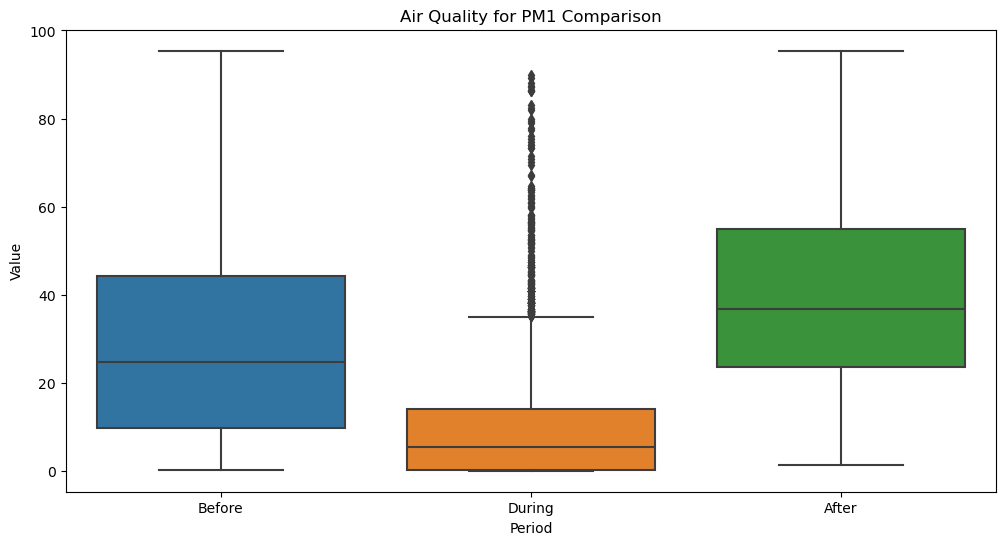

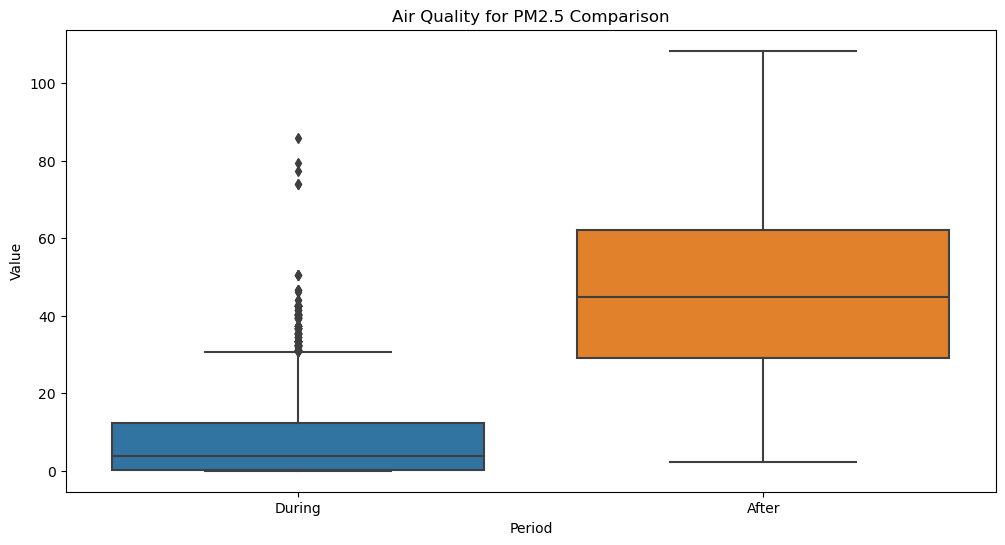

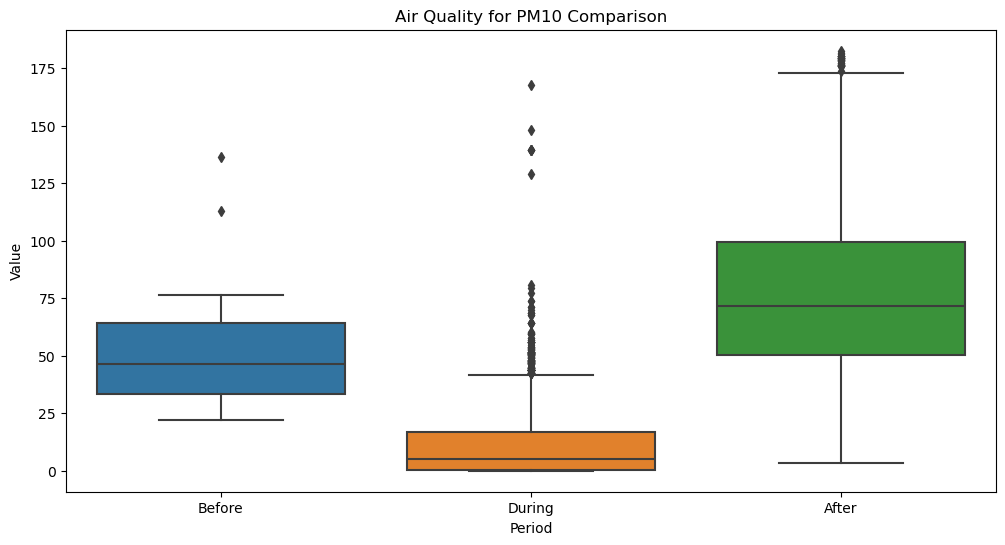

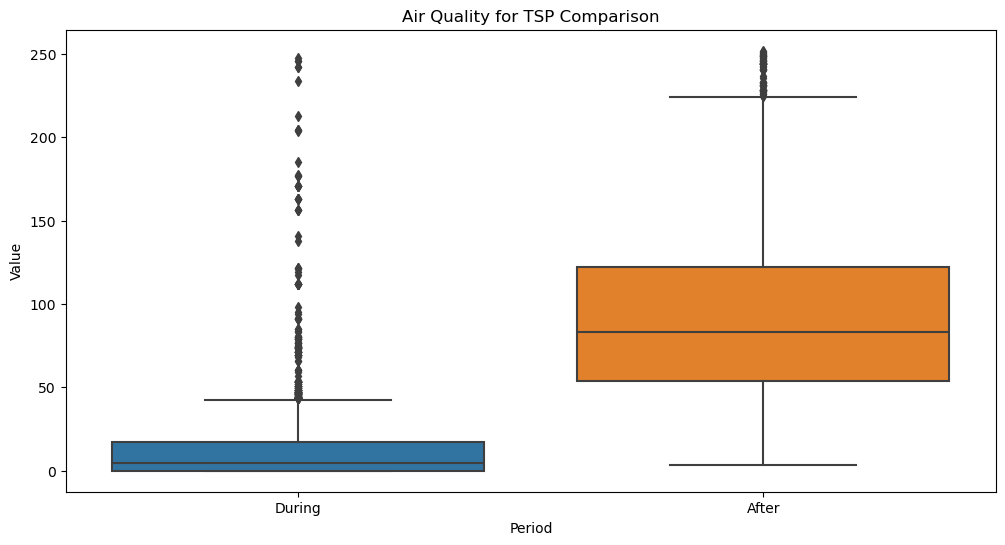

In [375]:
from tabulate import tabulate

# Function to calculate and print descriptive statistics
def calculate_statistics(df):
    periods = ['Before', 'During', 'After']
    stats = {}
    for period in periods:
        period_data = df[df['period'] == period]['value']
        stats[period] = {
            'Mean': period_data.mean(),
            'Median': period_data.median(),
            'Std Dev': period_data.std(),
            'Min': period_data.min(),
            'Max': period_data.max()
        }
    return stats

# Calculate and print statistics for each particulate matter type
for pm_type, df in data_frames.items():
    print(f"\nStatistics for {pm_type}:")
    stats = calculate_statistics(df)
    headers = ['Period', 'Mean', 'Median', 'Std Dev', 'Min', 'Max']
    rows = []
    for period, values in stats.items():
        row = [period] + [values[stat] for stat in headers[1:]]
        rows.append(row)
    print(tabulate(rows, headers=headers, tablefmt="pretty"))

    
    # Plot data
for pm_type, df in data_frames.items():
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='period', y='value', data=df)
    plt.title(f'Air Quality for {pm_type} Comparison')
    plt.xlabel('Period')
    plt.ylabel('Value')
    plt.show()

#### Findings:
The table provides statistics on the Air Quality Index (AQI) values for different particulate matters in Kathmandu across three periods: Before, During, and After the COVID-19 lockdown.

From the data, it's evident that during the lockdown period, there was a significant improvement in air quality across all particulate matters compared to before and after the lockdown. The lower mean and median AQI values during the lockdown period indicate cleaner air quality. However, after the lockdown, the AQI values increased again, suggesting a return to previous pollution levels as the economic activities resumed. Overall, the data supports the conclusion that there was an improvement in AQI during the COVID-19 lockdown in Kathmandu.

### Research Question 2:
What was the change in air quality in Kathmandu during the Dashain festival period, and does it align with the common belief that air pollution of Kathmandu decreases during this time due to reduced vehicle and economic activities?

Statistics for PM1:
Period                          Mean    Median    Std Dev    Min    Max
---------------------------  -------  --------  ---------  -----  -----
15 days before 2020 Dashain  25.5984      24.9    12.2819    3.8   74
2020 Dashain                 35.9833      35.2    12.8596   11.6   81.4
15 days after 2020 Dashain   35.819       31      21.883     3.8   95.3


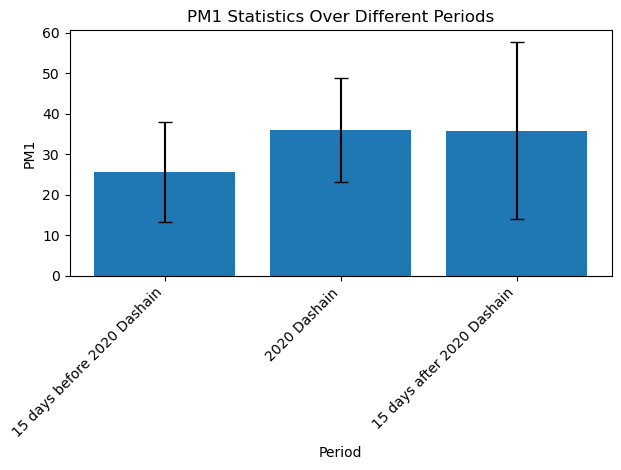

Statistics for PM2.5:
Period                          Mean    Median    Std Dev    Min    Max
---------------------------  -------  --------  ---------  -----  -----
15 days before 2020 Dashain  32.5655      30      13.4752    7.2   97.5
2020 Dashain                 42.722       41      14.2095   13.9   91.1
15 days after 2020 Dashain   43.6418      39.7    22.8384    7.6  103.6


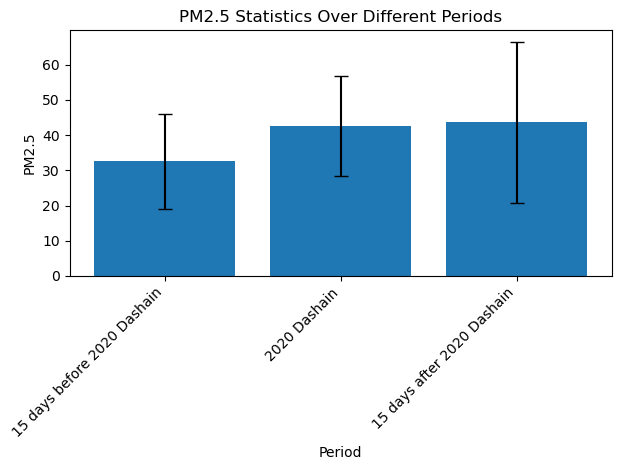

Statistics for PM10:
Period                          Mean    Median    Std Dev    Min    Max
---------------------------  -------  --------  ---------  -----  -----
15 days before 2020 Dashain  61.0016      52.3    27.1414   15.5  171.6
2020 Dashain                 64.157       58.3    22.8267   22.7  150
15 days after 2020 Dashain   83.6755      77.1    40.1406   23.2  182.5


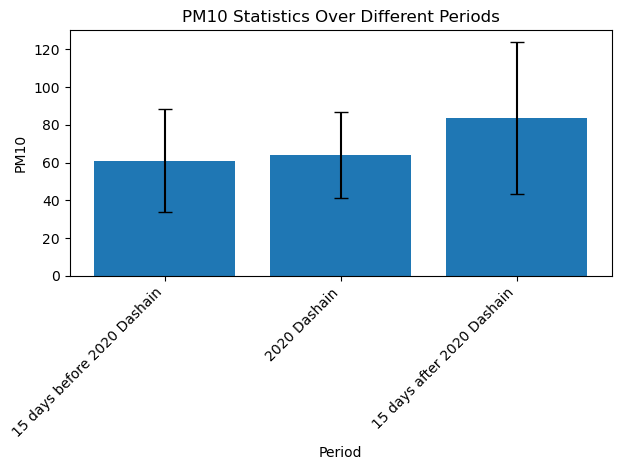

Statistics for TSP:
Period                           Mean    Median    Std Dev    Min    Max
---------------------------  --------  --------  ---------  -----  -----
15 days before 2020 Dashain   81.7392     59.2     52.7362   27    247.9
2020 Dashain                  87.4348     77.2     45.9083   36.8  244.2
15 days after 2020 Dashain   107.075      91.95    60.8828   24.2  248.5


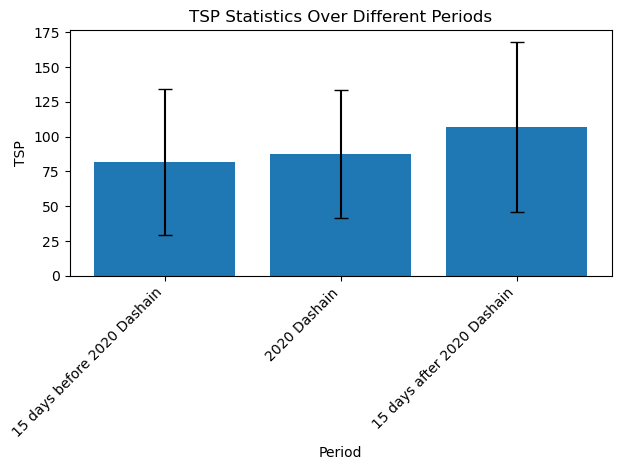

In [382]:
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate

# Define the Dashain periods and comparison periods
dashain_2020_start = pd.to_datetime('2020-10-20')
dashain_2020_end = pd.to_datetime('2020-10-27')

periods = [
    ('15 days before 2020 Dashain', dashain_2020_start - pd.Timedelta(days=15), dashain_2020_start - pd.Timedelta(days=1)),
    ('2020 Dashain', dashain_2020_start, dashain_2020_end),
    ('15 days after 2020 Dashain', dashain_2020_end + pd.Timedelta(days=1), dashain_2020_end + pd.Timedelta(days=15))
]

# Function to calculate and print descriptive statistics
def calculate_statistics(df, start_date, end_date):
    period_data = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date)]['value']
    stats = {
        'mean': period_data.mean(),
        'median': period_data.median(),
        'std_dev': period_data.std(),
        'min': period_data.min(),
        'max': period_data.max()
    }
    return stats

# Function to create bar chart
def create_bar_chart(data, ylabel):
    periods = [key for key in data]
    means = [data[period]['mean'] for period in periods]
    std_devs = [data[period]['std_dev'] for period in periods]

    x = range(len(periods))
    plt.bar(x, means, yerr=std_devs, capsize=5)
    plt.xlabel('Period')
    plt.ylabel(ylabel)
    plt.xticks(x, periods, rotation=45, ha='right')
    plt.title(f'{ylabel} Statistics Over Different Periods')
    plt.tight_layout()
    plt.show()

# Function to print statistics in a table
def print_statistics_table(data, pm_type):
    headers = ['Period', 'Mean', 'Median', 'Std Dev', 'Min', 'Max']
    rows = []
    for period_name, stats in data.items():
        row = [period_name, stats['mean'], stats['median'], stats['std_dev'], stats['min'], stats['max']]
        rows.append(row)
    print(f"Statistics for {pm_type}:")
    print(tabulate(rows, headers=headers))

# Calculate and print statistics for each particulate matter type and period
for pm_type, df in data_frames.items():
    pm_data = {}
    for period_name, start_date, end_date in periods:
        stats = calculate_statistics(df, start_date, end_date)
        pm_data[period_name] = stats
    print_statistics_table(pm_data, pm_type)
    create_bar_chart(pm_data, pm_type)


#### Findings:
The data suggests that there is no significant effect or change on the AQI (Air Quality Index) during the Dashain festival period in Kathmandu. While there might be slight fluctuations in AQI values, particularly during the festival days, these changes do not seem to have a substantial impact on overall air quality levels.  Therefore, the data does not strongly support the notion that theres noticeable improvement in air quality during Dashain in Kathmandu.

### Research Question 3:
How do the AQI values for PM1, PM2.5, PM10, and TSP compare at different times of the day?

,6,12,18,0
PM1,23.080794,29.954693,30.476527,38.533162
PM2.5,27.481877,38.326164,34.068732,43.578808
PM10,59.436280,71.788961,41.931425,52.609620
TSP,301.705640,123.707317,53.267699,64.640792


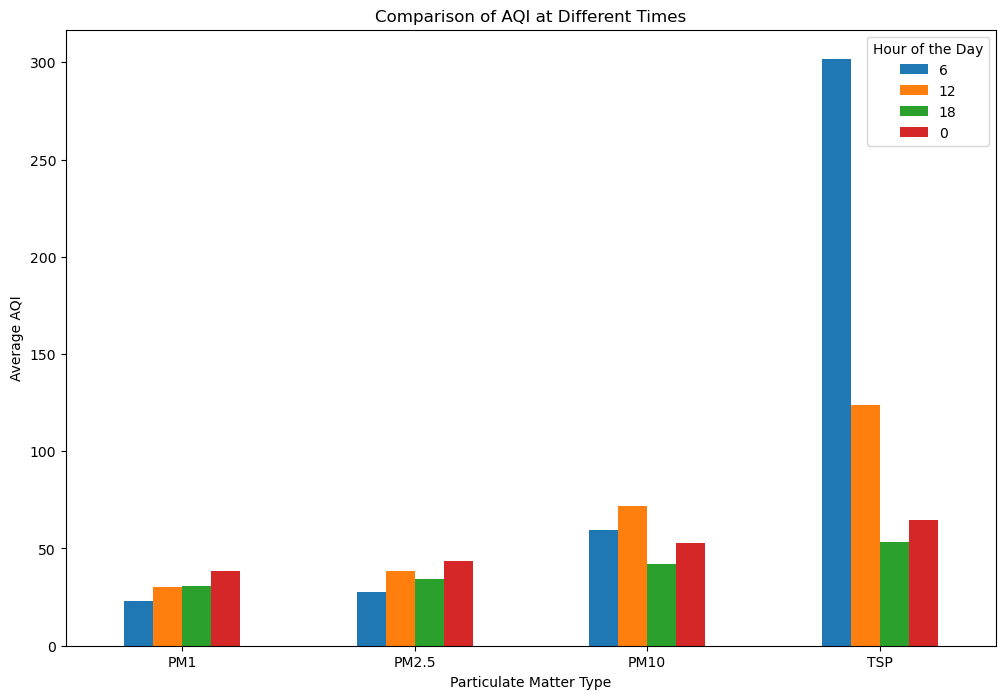

In [389]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# List of particulate matter types
pm_types = ['PM1', 'PM2.5', 'PM10', 'TSP']

# Dictionary to store dataframes
pm_dataframes = {}

for pm_type in pm_types:
    # Load the CSV file
    file_path = f'reduced_air_quality_{pm_type}.csv'
    pm_dataframes[pm_type] = pd.read_csv(file_path)

# Define the times of interest
times_of_interest = [6, 12, 18, 0]

# Dictionary to store AQI values at specific times
aqi_comparison = {time: [] for time in times_of_interest}

for pm_type, df in pm_dataframes.items():
    # Convert the datetime column to a datetime object
    df['datetime'] = pd.to_datetime(df['datetime'])
    
    for time in times_of_interest:
        # Filter the data for the specific time
        time_data = df[df['datetime'].dt.hour == time]
        
        # Calculate the mean AQI for this time and add it to the comparison dictionary
        mean_aqi = time_data['value'].mean()
        aqi_comparison[time].append(mean_aqi)

# Convert the comparison dictionary to a DataFrame
comparison_df = pd.DataFrame(aqi_comparison, index=pm_types)

# Display the comparison DataFrame
display(comparison_df)

# Plot the data
comparison_df.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of AQI at Different Times')
plt.xlabel('Particulate Matter Type')
plt.ylabel('Average AQI')
plt.legend(title='Hour of the Day')
plt.xticks(rotation=0)
plt.show()


#### Findings
The table and bar chart display the average AQI (Air Quality Index) values for different particulate matter (PM) types at four specific times of the day: 6 AM, 12 PM, 6 PM, and midnight (0 hours).

##### Observations:
- For PM1, the highest average values are observed at midnight (0 hours) with a value of 38.53.
- For PM2.5, the highest average values are also observed at midnight (0 hours) with a value of 43.58.
- For PM10, the highest average values are observed at 12 PM (noon) with a value of 71.79.
- For TSP (Total Suspended Particles), the highest average values are observed at 6 AM with a value of 301.71.
- TSP consistently shows the highest AQI values among all particulate matter types at all times of the day, indicating potentially higher levels of coarse particles in the air compared to finer particles (PM1 and PM2.5).

### Research Question 4

What are the seasons exhibiting the highest and lowest Air Quality Index values based on the bhaisepati station's data?"

,Spring,Summer,Autumn,Winter
PM1,27.059053,4.538547,36.419818,52.031711
PM2.5,42.251140,5.794654,46.492695,73.386522
PM10,72.669454,7.737507,71.610026,124.928624
TSP,127.191359,18.825618,211.494882,218.341468


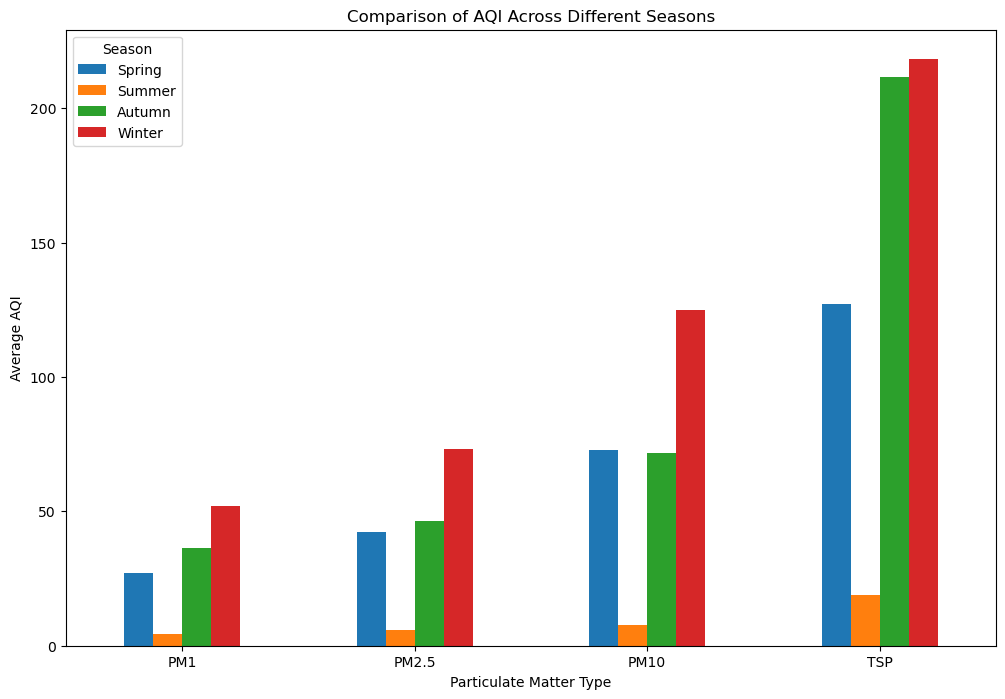

In [412]:

# Define the seasons
def get_season(date):
    if date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    elif date.month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'


# Dictionary to store AQI values for each season
seasonal_aqi = {'Spring': [], 'Summer': [], 'Autumn': [], 'Winter': []}

for pm_type, df in pm_dataframes.items():
    # Convert the datetime column to a datetime object
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['season'] = df['datetime'].apply(get_season)
    
    # Calculate the mean AQI for each season
    seasonal_means = df.groupby('season')['value'].mean()
    
    for season in seasonal_aqi:
        seasonal_aqi[season].append(seasonal_means.get(season, np.nan))

# Convert the seasonal AQI dictionary to a DataFrame
seasonal_comparison_df = pd.DataFrame(seasonal_aqi, index=pm_types)

# Display the seasonal comparison DataFrame
display(seasonal_comparison_df)



# Plot the data
seasonal_comparison_df.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of AQI Across Different Seasons')
plt.xlabel('Particulate Matter Type')
plt.ylabel('Average AQI')
plt.legend(title='Season')
plt.xticks(rotation=0)
plt.show()


#### Findings
The data suggests that winter tends to have the highest AQI values across all particulate matter types, indicating potentially worse air quality during this season. This could be attributed to factors such as increased emissions from heating sources and reduced atmospheric dispersion. 

Also the data suggests that summer have the lowest AQI values across all particulate matter types. This could be due to higher temperatures and increased sunlight can enhance dispersion and breakdown of pollutants, leading to lower concentrations of particulate matter in the air. Aditionally, during summer vegetation is typically at its peak, which can help absorb certain pollutants and improve air quality. 

### Research Question 5:
How does the Air Quality Index vary across different months for various particulate matter types?

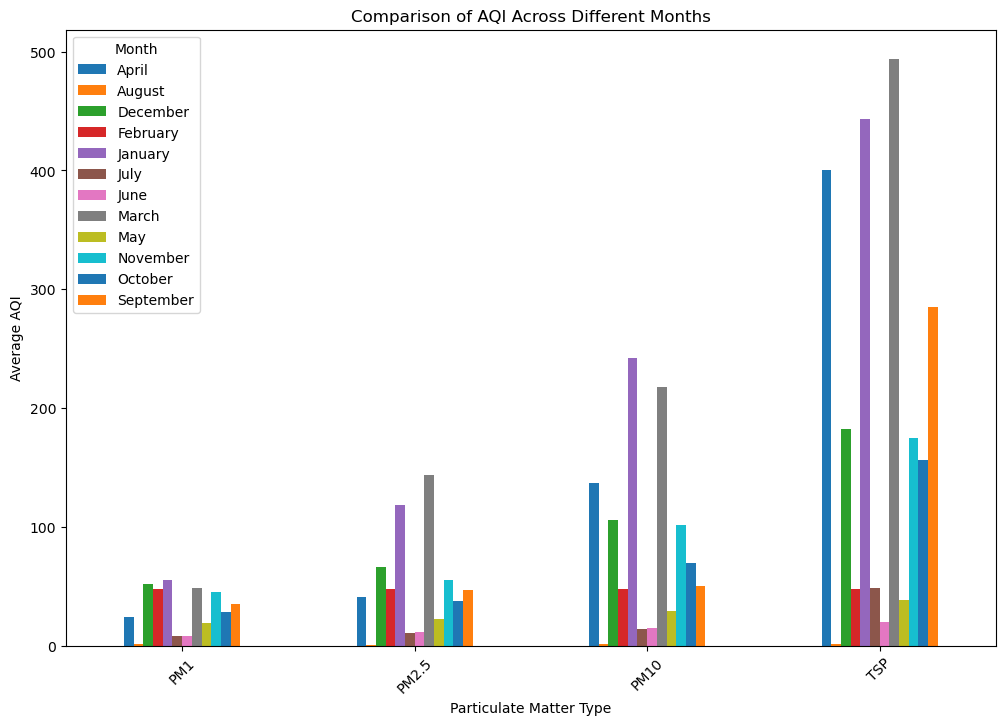

In [352]:
# Define the seasons
def get_month(date):
    return date.strftime('%B')

# List of particulate matter types
pm_types = ['PM1', 'PM2.5', 'PM10', 'TSP']

# Dictionary to store dataframes
pm_dataframes = {}

for pm_type in pm_types:
    # Load the CSV file
    file_path = f'reduced_air_quality_{pm_type}.csv'
    pm_dataframes[pm_type] = pd.read_csv(file_path)

# Dictionary to store AQI values for each month
monthly_aqi = {}

for pm_type, df in pm_dataframes.items():
    # Convert the datetime column to a datetime object
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['month'] = df['datetime'].apply(get_month)
    
    # Calculate the mean AQI for each month
    monthly_means = df.groupby('month')['value'].mean()
    
    for month in monthly_means.index:
        if month in monthly_aqi:
            monthly_aqi[month].append(monthly_means[month])
        else:
            monthly_aqi[month] = [monthly_means[month]]

# Convert the monthly AQI dictionary to a DataFrame
monthly_comparison_df = pd.DataFrame(monthly_aqi, index=pm_types)

# # Display the monthly comparison DataFrame
# print(monthly_comparison_df)

# Plot the data
monthly_comparison_df.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of AQI Across Different Months')
plt.xlabel('Particulate Matter Type')
plt.ylabel('Average AQI')
plt.legend(title='Month')
plt.xticks(rotation=45)
plt.show()


In [416]:
display(monthly_comparison_df)


,April,August,December,February,January,July,June,March,May,November,October,September
PM1,24.235844,1.174522,52.225362,48.01452,54.864890,8.563511,8.147277,48.410332,18.881579,45.414190,28.125000,35.321039
PM2.5,40.812000,0.915615,66.157527,48.01452,118.709888,10.600988,11.158152,143.662619,22.338967,55.576233,38.006403,46.664892
PM10,137.286800,1.123810,106.173297,48.01452,242.518202,14.333922,14.824457,217.908376,28.987793,101.445142,69.755782,50.477273
TSP,400.751200,1.586807,182.430824,48.01452,443.489101,48.588039,19.832609,493.755059,38.205621,174.974290,155.960899,285.327520


#### Findings

- PM1: The highest AQI values are observed in January, February, and December, while the lowest values are in August.
- PM2.5: Similar to PM1, the highest AQI values are observed in January, February, and December, while the lowest values are in August.
- PM10: The highest AQI values are observed in January and December, while the lowest values are in August.
- TSP (Total Suspended Particles): The highest AQI values are observed in January and December, while the lowest values are in August.
- The month exhibiting the highest AQI values across all particulate matter types is January, while the month with the lowest AQI values is August.
